<a href="https://colab.research.google.com/github/Bosy-Ayman/Machine_Learning/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

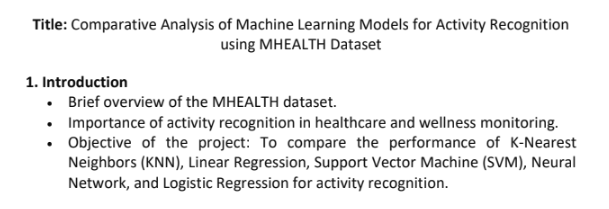

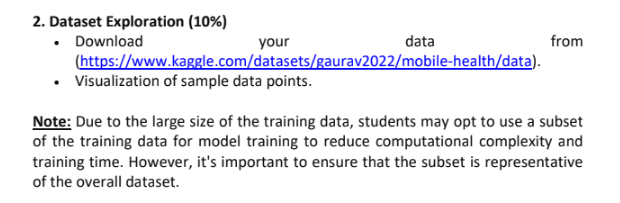

Kaggle:https://www.kaggle.com/datasets/gaurav2022/mobile-health/data

Attribute Information:

alx: acceleration from the left-ankle sensor (X axis)

aly: acceleration from the left-ankle sensor (Y axis)

alz: acceleration from the left-ankle sensor (Z axis)

glx: gyro from the left-ankle sensor (X axis)

gly: gyro from the left-ankle sensor (Y axis)

glz: gyro from the left-ankle sensor (Z axis)

arx: acceleration from the right-lower-arm sensor (X axis)

ary: acceleration from the right-lower-arm sensor (Y axis)

arz: acceleration from the right-lower-arm sensor (Z axis)

grx: gyro from the right-lower-arm sensor (X axis)

gry: gyro from the right-lower-arm sensor (Y axis)

grz: gyro from the right-lower-arm sensor (Z axis)

subject: volunteer number

Activity: corresponding activity

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns
from  sklearn import datasets
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error

In [3]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [4]:
!pip install -U scikit-learn

In [153]:
!kaggle datasets download -d gaurav2022/mobile-health


!unzip mobile-health.zip



Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health
License(s): CC0-1.0
mobile-health.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  mobile-health.zip
replace mhealth_raw_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Import Data

In [47]:
df = pd.read_csv('/content/mhealth_raw_data.csv',nrows=9000)


In [49]:
df.head(10)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1
5,2.2639,-9.4493,0.61267,0.098330,-0.84240,-0.68959,-8.7247,-4.0449,0.506090,-0.45686,-1.0082,0.025862,0,subject1
6,2.1740,-9.6574,0.60137,0.098330,-0.84240,-0.68959,-9.0864,-4.1474,0.261380,-0.42745,-1.0164,0.019397,0,subject1
7,2.2023,-9.4397,0.58129,0.098330,-0.84240,-0.68959,-9.0143,-4.0052,0.476820,-0.42745,-1.0164,0.019397,0,subject1
8,2.2037,-9.6283,0.54062,0.076067,-0.83114,-0.69155,-9.0469,-4.0475,0.245540,-0.42745,-1.0164,0.019397,0,subject1
9,2.2135,-9.6887,0.43353,0.076067,-0.83114,-0.69155,-8.8318,-4.1090,0.096632,-0.42745,-1.0164,0.019397,0,subject1


#Explore Data

*if we used the full data it would need to be cleaned*

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alx       9000 non-null   float64
 1   aly       9000 non-null   float64
 2   alz       9000 non-null   float64
 3   glx       9000 non-null   float64
 4   gly       9000 non-null   float64
 5   glz       9000 non-null   float64
 6   arx       9000 non-null   float64
 7   ary       9000 non-null   float64
 8   arz       9000 non-null   float64
 9   grx       9000 non-null   float64
 10  gry       9000 non-null   float64
 11  grz       9000 non-null   float64
 12  Activity  9000 non-null   int64  
 13  subject   9000 non-null   object 
dtypes: float64(12), int64(1), object(1)
memory usage: 984.5+ KB


In [51]:
missing_values_count = df.isnull().sum()

missing_values_count[:]

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

# Clean Data



In [52]:
df.dropna(inplace = True)

In [53]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

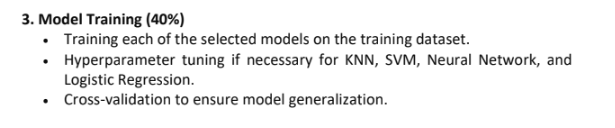

# **Split the data into test & train**

In [54]:
X = df.drop(['subject','Activity'], axis=1).values  #Input
y = df['Activity'].values #target

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Training the dataset & Hyperparameter tuning**

##K-nearest Neighbor (KNN)

In [56]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [57]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)


In [58]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [59]:
g_res.best_score_

0.9586111111111112

In [19]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

In [60]:
best_model = g_res.best_estimator_


***Apply the best hyperparameter***

In [61]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',metric = 'minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [62]:
y_pred_knn = best_model.predict(x_test)


In [63]:
knn.score(x_test,y_test)

0.9638888888888889

In [ ]:
cv_scores = cross_val_score(knn, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score:", mean_cv_score)

##SVM

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],  # Only applicable for poly kernel
    'gamma': ['scale', 'auto']  # Only applicable for rbf and sigmoid kernels
}


In [ ]:
svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)

g_res = grid_search.fit(x_train, y_train)

best_params = g_res.best_params_
print("Best Hyperparameters:", best_params)

best_model = g_res.best_estimator_

y_pred_SVM = best_model.predict(x_test)

***Apply the best hyperparameter***

In [26]:
RBF = SVC(kernel='rbf',degree=3)
RBF.fit(x_train, y_train)
y_pred_RBF = RBF.predict(x_test)
print('prediction', y_pred_RBF)


ValueError: The number of classes has to be greater than one; got 1 class

## Neural Network

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}



In [36]:
mlp = MLPClassifier(max_iter=100)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)


Best Hyperparameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


***Apply the best hyperparameter***

In [85]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', max_iter=1000)
nn_model.fit(x_train, y_train)
y_pred_NN = nn_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred_NN)

conf_matrix

array([[1262,   96],
       [  26,  616]])

In [91]:
y_pred_NN

array([1, 0, 0, ..., 1, 0, 1])

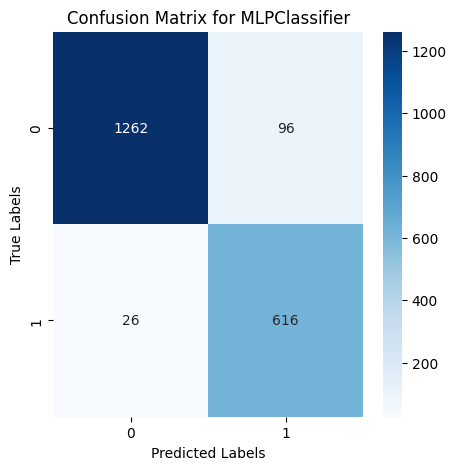

In [90]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MLPClassifier')
plt.show()

In [55]:
nn_model.score(x_test,y_test)

0.938

##Logistic Regression

In [37]:
logModel = LogisticRegression()

In [38]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [40]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
clf.fit(x_train, y_train)
y_predlog = clf.predict(x_test)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


ValueError: 
All the 4800 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1221, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1174, in _fit_liblinear
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1246, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 75, in _check_solver
    raise ValueError(
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1182, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet.")
ValueError: l1_ratio must be specified when penalty is elasticnet.

--------------------------------------------------------------------------------
581 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'l2'} or None. Got 'none' instead.

--------------------------------------------------------------------------------
619 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.


***Apply the best hyperparameter***

In [41]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=1.0, solver='lbfgs')
y_predlog = lr_model.fit(x_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [94]:
y_predlog = y_predlog.predict(x_test)
y_predlog

array([1, 0, 0, ..., 1, 0, 1])

In [95]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[1118,  240],
       [  27,  615]])

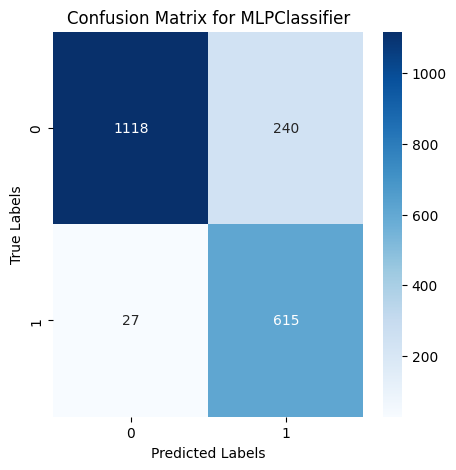

In [96]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MLPClassifier')
plt.show()

In [57]:
lr_model.score(x_test,y_test)

0.8665

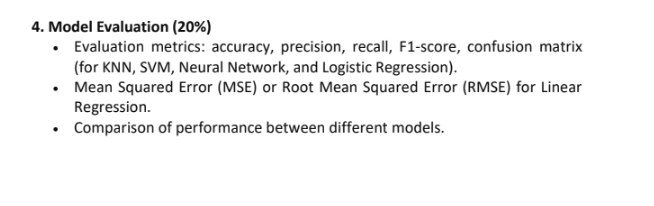

#**Evaluation Metrics**

In [42]:
import seaborn as sns
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Sensitvity: ' + '{:.4%}'.format(sensitivity))
    print(f'Confusion Matrix: ',conf_matrix)
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.show()

##K-nearest Neighbor (KNN)

In [43]:
from sklearn.metrics import classification_report
resultsSummarizer(y_test, y_pred)

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%
Sensitvity: 100.0000%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## SVM

In [44]:
from sklearn.metrics import classification_report
resultsSummarizer(y_test, y_pred_SVM)

NameError: name 'y_pred_SVM' is not defined

## Neural Networks

In [45]:
from sklearn.metrics import classification_report
resultsSummarizer(y_test, y_pred_NN)

NameError: name 'y_pred_NN' is not defined

## Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
resultsSummarizer(y_test, y_predlog)

# **Compare the results between each model**

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define models
models = {
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'Neural Network': MLPRegressor(),
    'Linear Regression': LinearRegression()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(x_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Calculate MSE or RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {'MSE': mse, 'RMSE': rmse}

for name, metrics in results.items():
    print(f'{name}: MSE = {metrics["MSE"]}, RMSE = {metrics["RMSE"]}')

best_model_name = min(results, key=lambda x: results[x]['MSE'])  # Choose model with lowest MSE
print(f'\nBest Model: {best_model_name}')


KNN: MSE = 0.0, RMSE = 0.0
SVM: MSE = 0.0, RMSE = 0.0
Neural Network: MSE = 0.2825215777710849, RMSE = 0.5315275889086896
Linear Regression: MSE = 0.0, RMSE = 0.0

Best Model: KNN


# Comparison of Preformance between each model

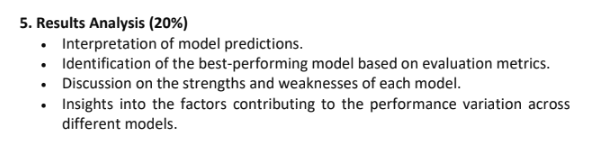



*   List item



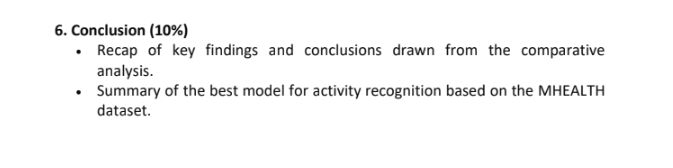